### Sine function - accuracy

(For now, only using piecewise approximation).

Range: $[-\pi .. \pi]$.

In [1]:
from qmath.poly import EvalFunctionPPA
from qmath.utils.test_utils import QPUTestHelper
from psiqworkbench import QPU, QFixed
from psiqworkbench.filter_presets import BIT_DEFAULT

import numpy as np
from matplotlib import pyplot as plt

qpu_helper = QPUTestHelper(num_qubits=1000, qubits_per_reg=50, radix=40, num_inputs=1)
q_x = qpu_helper.inputs[0]
func = EvalFunctionPPA(np.sin, interval=(-np.pi, np.pi), degree=5, error_tol=1e-10)
func.compute(q_x)
qpu_helper.record_op(func.get_result_qreg())

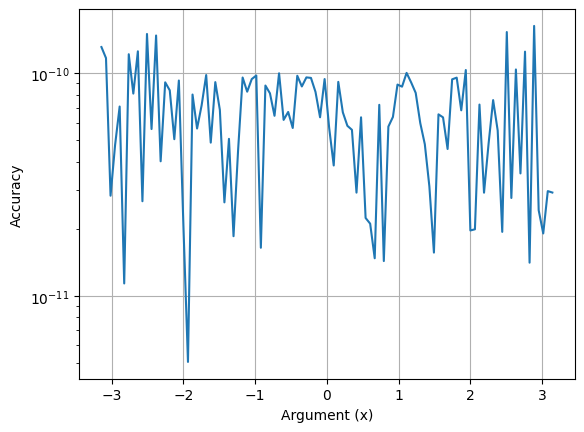

In [2]:
x_range = np.linspace(-np.pi, np.pi, 100)
diffs = [np.abs(qpu_helper.apply_op([x]) - np.sin(x)) for x in x_range]

plt.plot(x_range, diffs)
plt.yscale('log')
plt.xlabel('Argument (x)')
plt.ylabel('Accuracy')
plt.grid()